# Lecture 05 - Quantum simulation <a class="tocSkip">


This notebook investigates some applications of quantum information to quantum simulation. As you can imagine, there are many directions that you take such a broad topic. I want to keep it simple, such that do not need to do complicated mathematical derivations to follow the construction and thus, we can do things with some detail.
    
The idea is to take the core model in Physics and develop several simulations with increasing degrees of complexity.  


## Structure of the course <a class="tocSkip">

[Lecture 01 - Introduction to quantum information](Lecture_01_Introduction_to_quantum_information.ipynb) - This notebook introduces some of the key aspects of quantum information theory and how to use Qiskit to study them. In particular, we will focus on how to define quantum states, to map information into a quantum system and characterize it. We will also introduce some brief notion of dynamical qua tum maps and how to represent them using quantum gates.

[Lecture 02 - Quantum information in multipartite registers](Lecture_02_Quantum_information_in_multipartite_registers.ipynb) -  This notebook explores the effects of quantum non-separability in quantum information, including entanglement, decoherence and the role of the environment. You guessed it, we are going to work with oscillators!
  
[Lecture 03 - Detection, measurements and information extraction](Lecture_03_Detection_measurements_and_information_extraction.ipynb) -  This notebook investigates the consequences and techniques of quantum measurement and how to obtain information about the state of quantum registers.
  
[Lecture 04 - Quantum computation](Lecture_04_Quantum_computation.ipynb) -  This notebook presents a brief introduction to quantum computation. Given that quantum computation is a body of knowledge on itself, this notebook goes through a set of basic algorithms, same of which will be used in future noteooks.

[Lecture 05 - Quantum simulations](Lecture_05_Quantum_simulations.ipynb) -  This notebook investigates some application of quantum information to quantum simulation.
    
[Lecture 06 - Quantum sensing](Lecture_06_Quantum_sensing.ipynb) -  This notebook investigates some application of quantum information to quantum enhanced sensing.



# Before we start... <a class="tocSkip">
 
  Let us begin by runnning the initialization cell
    
$$
\def\ket#1{\left|#1\right\rangle }%
\def\bra#1{\left\langle #1\right|}%
\def\braket#1#2{\langle#1|#2\rangle}%
$$
   

In [1]:
import numpy as np
import math as mt
import scipy as sp
import matplotlib.pyplot as plt
import random
import re             # regular expressions module
import sys



from tqdm.notebook import tqdm
from scipy.linalg import block_diag


from pylab import plot
from qiskit import *
from qiskit.visualization import *
from qiskit.ignis.verification import *

# importing specific packages of Qiskit
from qiskit import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute



from IPython.display import display, Image, SVG, Math, YouTubeVideo

%matplotlib inline

So the idea is to explore the many flavours of oscillators using a quantum computer. Of course we need to clarify whether we are considering the classical or the quantum model for oscillators. 

Indeed, we can have quantum simulation of classical models and quantum simulations of quantum models. In both cases they are quantum simulations, but the second situation is twicely quantum and therefore more interesting. We shall begin precicely with that case.

# The quantum model of the harmonic oscillator in a nutshell

 
The classical model for a harmonic oscillator can be derived on the Hamilton variational formalism
in terms of two canonical variables, namely the generalized position
$x$ and the generalized momentum $p$. In this formalism, the particle dynamics in one dimension is described by an Hamiltonian given by
\begin{equation}
H=\frac{p^{2}}{2m}+V(x).\label{eq.1.28}
\end{equation}
The potential corresponds to the function
$$
V(x) =\frac{1}{2}m\omega^{2}x^{2}.
$$ 

The quantum model for the harmonic oscillator can be obtained by replacing
the classical quantities $x$ and $p$ with two self-adjoint operators,
$\widehat{x}$ and $\widehat{p}$ respectively, satisfying the canonical
commutation relation $\left[\widehat{x},\widehat{p}\right]=i\hbar$.
The classical Hamiltonian becomes therefore a quantum operator
\begin{equation}
\widehat{H}=\frac{\widehat{p}^{2}}{2m}+\frac{1}{2}m\omega^{2}\hat{x}^{2}.\label{eq.1.33}
\end{equation}

A possible representation for the quantum operators is the so-called
position representation, which is given by
\begin{equation}
\widehat{p}=-i\hbar\frac{\partial}{\partial x}\text{ and}\;\widehat{x}=x,\label{eq.1.34}
\end{equation}
where the state of the system is described by the wave function $\psi(x)=\left\langle \psi\right.\left\vert x\right\rangle $,
with $\left\vert x\right\rangle $ the position eigenvector.

The evolution of the system is determined by the Schrödinger equation
\begin{equation}
i\hbar\frac{\partial}{\partial t}\psi\left(x\right)=\widehat{H}\psi\left(x\right).\label{eq.1.35}
\end{equation}
The stationary solutions of this equation for a particle are of the
form
\begin{equation}
\psi_{n}\left(x\right)=\frac{1}{\left(2^{n}n!\right)^{1/2}}\left[\frac{m\omega}{\pi\hbar}\right]^{1/4}\exp\left[-\frac{m\omega x^{2}}{2\hbar}\right]H_{n}\left(\sqrt{\frac{m\omega}{\hbar}}x\right),\label{eq.1.36}
\end{equation}
where $H_{n}$ are the Hermit polynomials, and corresponding to the
energies
\begin{equation}
E_{n}=\hbar\omega\left(n+\frac{1}{2}\right).\label{eq.1.37}
\end{equation}

The dynamics of the harmonic oscillator can be expressed in terms
of special operators, the so-called raising and lowering operators,
respectively
\begin{eqnarray}
\widehat{a}^{\dagger} & = & \left[m\omega/2\hbar\right]^{1/2}\left[m\omega\widehat{x}-i\widehat{p}\right],\label{eq.1.38-1}\\
\widehat{a} & = & \left[m\omega/2\hbar\right]^{1/2}\left[m\omega\widehat{x}+i\widehat{p}\right].\label{eq.1.39-1}
\end{eqnarray}
The Hamiltonian operator can be written in terms of these operators
as 
\begin{equation}
\widehat{H}=\hbar\omega\left(\widehat{a}^{\dagger}\widehat{a}+\frac{1}{2}\right).\label{eq.1.40}
\end{equation}

The fundamental state of a linear harmonic oscillator is the ground
state which corresponds to the stationary state of minimum energy
of the system. 

The ground state of the quantum oscillator is defined as:
\begin{equation}
\widehat{a}\left\vert 0\right\rangle =0.\label{eq.1.41}
\end{equation}

Another important class of states of the harmonic oscillator are the Fock states. 
Fock states $\left\vert n\right\rangle $ are defined as the eithe genstates
of the number operator $\widehat{N}\equiv\widehat{a}^{\dagger}\widehat{a}$
with eigenvalues $n$ corresponding to the different levels of the
harmonic oscillator. As the Hamiltonian operator can be written as
$\widehat{H}=\hbar\omega\left(\widehat{N}+1/2\right)$, Fock states
as also eigenstates of the Hamiltonian and they correspond to the
stationary solutions of the Schrödinger equation (\ref{eq.1.35}).


The raising and lowering operators (\ref{eq.1.38-1}) e (\ref{eq.1.39-1})
can be used to shift between Fock states with consecutive occupation
number
\begin{equation}
\widehat{a}^{\dagger}\left\vert n\right\rangle =\sqrt{n+1}\left\vert n+1\right\rangle \text{, }\widehat{a}\left\vert n\right\rangle =\sqrt{n}\left\vert n-1\right\rangle \text{ and }\widehat{a}^{\dagger}\widehat{a}\left\vert n\right\rangle =n\left\vert n\right\rangle .\label{eq.1.47}
\end{equation}

Hence the higher occupation states may be obtained from the ground
state by successive application of the raising operator.

Among the general properties of the Fock states, one should remember
that they are orthogonal 
\begin{equation}
\left\langle m\right\vert \left.n\right\rangle =\delta_{nm}\label{eq.1.49}
\end{equation}
and complete 
\begin{equation}
\overset{\infty}{\underset{n=0}{\sum}}\left\vert n\right\rangle \left\langle n\right\vert =\mathbf{1}\label{eq.1.50}
\end{equation}
where $\mathbf{1}$ is the identity operator. Since the norm of the
Fock states is finite, they form a complete set of basis vectors for
the Hilbert space.


The matrix expression of the creation and annihilation operators of the quantum harmonic oscillator with respect to the above orthonormal basis is
\begin{equation}
 a^{\dagger }={\begin{pmatrix}0&0&0&\dots &0&\dots \\{\sqrt {1}}&0&0&\dots &0&\dots \\0&{\sqrt {2}}&0&\dots &0&\dots \\0&0&{\sqrt {3}}&\dots &0&\dots \\\vdots &\vdots &\vdots &\ddots &\vdots &\dots \\0&0&0&\dots &{\sqrt {n}}&\dots &\\\vdots &\vdots &\vdots &\vdots &\vdots &\ddots \end{pmatrix}}
\end{equation}
\begin{equation}
 a={\begin{pmatrix}0&{\sqrt {1}}&0&0&\dots &0&\dots \\0&0&{\sqrt {2}}&0&\dots &0&\dots \\0&0&0&{\sqrt {3}}&\dots &0&\dots \\0&0&0&0&\ddots &\vdots &\dots \\\vdots &\vdots &\vdots &\vdots &\ddots &{\sqrt {n}}&\dots \\0&0&0&0&\dots &0&\ddots \\\vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\ddots \end{pmatrix}}
\end{equation}

And with this brief discussion we have reviewed the mais aspects of the quantum model of the harmonic oscillator.

We are now ready to develop a (quantum) computational model of the oscillator.

# A computational model of the quantum harmonic oscillator
The essence of a quantum simulation is to find an unitary transformation $\Phi$ that 
\begin{itemize}
\item maps the state of the original quantum system, say $\psi(t)$, into the state of the quantum register of the quantum computer (the quantum simulator), say $\phi(t)$, such that
$$
\phi(t) = \Phi \psi(t); 
$$
\item produces an  Hamiltonian describing the physical system, say $H_{sys}$ in terms of the states of the quantum computer, say $H_{sim}$ such that
$$
H_{sim}= \Phi H_{sys} \Phi^{-1}.
$$
\end{itemize}

## Adjusting the quantum model of the harmonic oscillator
So let us begin by attempting to map the states of the harmonic oscillator into the states of the register. An naif approach is to consider the basis of stationary states of the Harmonic oscillator and map them into the computational basis of the quantum register. 

The first dificulty is that the Hilbert space of the harmonic oscillator has infinite dimensions. Indeed, there is an infinite number of mutually orthogonal Fock state, while the number of registers available in a real quantum computer is finite and thus, so is finite the number of elements of the computational basis.

A solution is to truncate the range of acessible states of the harmonic oscillator to a handfull, for example
$$
\vert 0 \rangle, \vert 1 \rangle, \vert 2 \rangle, \text{ and } \vert 3 \rangle
$$
Of curse, this is  only valid if in someway we can guarantee that the state of the oscillator never reaches higher energy states, which could be achieved by constrains on the energy available to the oscillator. This implies that the raising and lowering operators also can be represented by finite matrices:
\begin{equation}
 a^{\dagger }={\begin{pmatrix}
 0&0&0&0\\
 {\sqrt {1}}&0&0&0\\
 0&{\sqrt {2}}&0&0\\
 0&0&{\sqrt {3}}&0\end{pmatrix}}
\end{equation}
\begin{equation}
 a={\begin{pmatrix}
 0&{\sqrt {1}}&0&0\\
 0&0&{\sqrt {2}}&0\\
 0&0&0&{\sqrt {3}}\\
  0&0&0&0
 \end{pmatrix}}
\end{equation}
resulting in the Hamiltonian operator
\begin{equation}
 H=\hbar \omega{\begin{pmatrix}
 0&0&0&0\\
 0&1&0&0\\
 0&0&2&0\\
 0&0&0&3
 \end{pmatrix}}+\frac{1}{2}
\end{equation}

## Mapping the states of the system into the states of the simulator

$$
\vert {0}_{sys} \rangle \rightarrow \vert {00}_{sim} \rangle \\
\vert {1}_{sys} \rangle \rightarrow \vert {01}_{sim} \rangle \\
\vert {2}_{sys} \rangle \rightarrow \vert {10}_{sim} \rangle \\
\vert {3}_{sys} \rangle \rightarrow \vert {11}_{sim} \rangle
$$

$$
\Phi = 
\vert {00}_{sim} \rangle \langle {0}_{sys} \vert +
\vert {01}_{sim} \rangle \langle {1}_{sys} \vert +
\vert {10}_{sim} \rangle \langle {2}_{sys} \vert +
\vert {11}_{sim} \rangle \langle {3}_{sys} \vert
$$

$$
\Phi^{-1} = \Phi^{\dagger} =
\vert  {0}_{sys}\rangle \langle {00}_{sim} \vert +
\vert  {1}_{sys}\rangle \langle {01}_{sim} \vert +
\vert  {2}_{sys}\rangle \langle {10}_{sim} \vert +
\vert  {3}_{sys}\rangle \langle {11}_{sim} \vert
$$


## Developing the simulation Hamiltonian

$$
H_{sim}= \Phi H_{sys} \Phi^{-1} = \hbar \omega{\begin{pmatrix}
 0&0&0&0\\
 0&1&0&0\\
 0&0&2&0\\
 0&0&0&3
 \end{pmatrix}}+\frac{1}{2}
$$

$$
H_{sys} = \hbar \omega \left(
\frac{1}{2}   \langle {0}_{sys}\vert  {0}_{sys}\rangle + 
\frac{3}{2}   \langle {1}_{sys}\vert  {1}_{sys}\rangle + 
\frac{5}{2}   \langle {2}_{sys}\vert  {2}_{sys}\rangle + 
\frac{7}{2}   \langle {3}_{sys}\vert  {3}_{sys}\rangle
\right)
$$

$$
H_{sim} = \hbar \omega \left(
\frac{1}{2}   \langle {00}_{sim}\vert  {00}_{sim}\rangle + 
\frac{3}{2}   \langle {01}_{sim}\vert  {01}_{sim}\rangle + 
\frac{5}{2}   \langle {10}_{sim}\vert  {10}_{sim}\rangle + 
\frac{7}{2}   \langle {11}_{sim}\vert  {11}_{sim}\rangle
\right)
$$


## Decomposing $H_{sim}$ into gates

$$
\frac{1}{2}   \langle {00}_{sim}\vert  {00}_{sim}\rangle  =
$$

$$
i \partial_t \vert \phi \rangle = H_{sim} \vert \phi \rangle 
$$

In [2]:
# Initializing a two-qubit quantum state
initial_state = [
    1/mt.sqrt(2)+0.j,
    1/mt.sqrt(2)+0.j,
    0,
    0]
#Constructing the Hamiltonian
H = [
    [0.5,0,0,0],
    [0,1.5,0,0],
    [0,0,2.5,0],
    [0,0,0,3.5]
]
#final time
time = 0.5
# Create a Quantum Circuit acting on a quantum register of 1 qubits and 2 bits
q = QuantumRegister(2, name = 'q')
circuit0 = QuantumCircuit(q,name='qc')
# Create the superposition state to show that things are working
circuit0.initialize(initial_state, [q[0],q[1]])

circuit0.hamiltonian(H, time,[q[0],q[1]])
simulator = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circuit0, simulator).result()
final_state = result.get_statevector(circuit0, decimals=16)

print('Initial state:\t', initial_state[0],' |00>',initial_state[1],' |01>',initial_state[2],' |10>',initial_state[3],' |11>')
print('Final state:\t', final_state[0],' |00>',final_state[1],' |01>',final_state[2],' |10>',final_state[3],' |11>')

Initial state:	 (0.7071067811865475+0j)  |00> (0.7071067811865475+0j)  |01> 0  |10> 0  |11>
Final state:	 (0.6851245437674767-0.17494101728127343j)  |00> (0.5173821608993933-0.4819913895320894j)  |01> 0j  |10> 0j  |11>


# Particle in a potential well


$$
H=\frac{p^{2}}{2m}+V(x).
$$
The potential corresponds to the function
$$
V(x) ={\begin{cases}
0,&{\mbox{if }}x<-L/2 {\mbox{ (the region I outside the well)}}\\
-V_0,&{\mbox{if }}-L/2<x<L/2 {\mbox{ (the region II inside the well)}}\\
0,&{\mbox{if }}x>L/2{\mbox{  (the region III outside the well)}}
\end{cases}}
$$ 


$$
\Psi(x) ={\begin{cases}
\psi _{1}(x),&{\mbox{if }}x<-L/2{\mbox{ (the region I outside the well)}}\\
\psi _{2}(x),&{\mbox{if }}-L/2<x<L/2{\mbox{ (the region II inside the well)}}\\
\psi _{3}(x),&{\mbox{if }}x>L/2{\mbox{  (the region III outside the well)}}
\end{cases}}
$$

For bounded states the energy is negative and we find
$$
\psi_{1}(x)=Ge^{{\alpha x}}\\
\psi_{2}(x)=A\sin(kx)+B\cos(kx)\\
\psi_{3}(x)=He^{{-\alpha x}}\\
$$
The boundary conditions result into two sorts of solutions, symmetric, for which $A=0$ and $G=H$, and antisymmetric, for which $B=0$ and $G=-H$. The symmetric and antisymmetric solutions must satisfy respectively
$$
\alpha =k\tan(kL/2)\\
\alpha =-k\cot(kL/2).
$$
The continuity conditions cannot be satisfied for an arbitrary value of the energy thus, only certain energy values, which are solutions on of these two equations, are allowed. 

The previous equations cannot be solved analytically and, depending on the width $L$ and depth $V_0$ of the potential, this system may have different and finite number of solutions. 

By contrast, positive energy levels have a continuous spectrum.

$$
\widehat{H}=\widehat{H}_{bounded} + \widehat{H}_{unbounded}
$$

$$
\widehat{H}_{bounded} = \sum_{n=0}^{N-1} E_{n} \vert \Psi_{n} \rangle \langle \Psi_{n} \vert
$$

$$
\widehat{H}_{unbounded} \approx \int_{-\infty}^{+\infty} \hbar \omega(k) \vert k \rangle \langle k \vert
$$

## Adjusting the quantum mode

$$
\widehat{H} \approx \widehat{H}_{bounded} 
$$

## Mapping the states of the system into the states of the simulator

$$
\vert \Psi_{0} \rangle \rightarrow \vert {00}_{sim} \rangle \\
\vert \Psi_{1} \rangle \rightarrow \vert {01}_{sim} \rangle \\
\vert \Psi_{2} \rangle \rightarrow \vert {10}_{sim} \rangle \\
\vert \Psi_{3} \rangle \rightarrow \vert {11}_{sim} \rangle
$$

$$
\Phi = 
\vert {00}_{sim} \rangle \langle \Psi_{0} \vert +
\vert {01}_{sim} \rangle \langle \Psi_{1} \vert +
\vert {10}_{sim} \rangle \langle \Psi_{2} \vert +
\vert {11}_{sim} \rangle \langle \Psi_{3} \vert
$$

$$
\Phi^{-1} = \Phi^{\dagger} =
\vert  \Psi_{0}\rangle \langle {00}_{sim} \vert +
\vert  \Psi_{1}\rangle \langle {01}_{sim} \vert +
\vert  \Psi_{2}\rangle \langle {10}_{sim} \vert +
\vert  \Psi_{3}\rangle \langle {11}_{sim} \vert
$$

## Developing the simulation Hamiltonian


$$
H_{sim} =
E_{0}   \langle {00}_{sim}\vert  {00}_{sim}\rangle + 
E_{1}   \langle {01}_{sim}\vert  {01}_{sim}\rangle + 
E_{2}   \langle {10}_{sim}\vert  {10}_{sim}\rangle + 
E_{3}   \langle {11}_{sim}\vert  {11}_{sim}\rangle
$$

## Extending the model

$$
H=\frac{p^{2}}{2m}+V(x).
$$

$$
V(x) = \sum_{q=-N}^{N-1} U(x - q d)
$$

$$
U(x) ={\begin{cases}
0,&{\mbox{if }}x<-L/2 {\mbox{ (the region I outside the well)}}\\
-V_0,&{\mbox{if }}-L/2<x<L/2 {\mbox{ (the region II inside the well)}}\\
0,&{\mbox{if }}x>L/2{\mbox{  (the region III outside the well)}}
\end{cases}}
$$ 

Kronig-Penney model
$$
\vert \Psi_{n,q} \rangle 
$$

$$
\widehat{H}_{bounded} = 
\sum_{q=-N}^{N-1} \sum_{n=0}^{N-1} E_{n} \vert \Psi_{n,q} \rangle \langle \Psi_{n,q} \vert +
\sum_{q=-N}^{N-1} \sum_{p=-N}^{N-1} \sum_{n=0}^{N-1} \sum_{m=0}^{N-1}
 G_{nq;mp}\vert \Psi_{n,q} \rangle \langle \Psi_{m,p} \vert
$$

$$
 G_{nq;mp} \approx g_{n;m}\left( \delta_q,p+1 \delta_q,p-1 \right)
$$

$g_{n;m}\approx g_0$

### Combining two wells

In [3]:
# Initializing a two-qubit quantum state
initial_state = [
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0
]
#Constructing the Hamiltonian
g0= 0.1
H = [
    [0.5,0,0,0,g0,g0,g0,g0],
    [0,1.5,0,0,g0,g0,g0,g0],
    [0,0,2.5,0,g0,g0,g0,g0],
    [0,0,0,3.5,g0,g0,g0,g0],
    [g0,g0,g0,g0,0.5,0,0,0],
    [g0,g0,g0,g0,0,1.5,0,0],
    [g0,g0,g0,g0,0,0,2.5,0],
    [g0,g0,g0,g0,0,0,0,3.5]
    
]
#final time
time = 0.5
# Create a Quantum Circuit acting on a quantum register of 1 qubits and 2 bits
q = QuantumRegister(3, name = 'q')
circuit0 = QuantumCircuit(q,name='qc')
# Create the superposition state to show that things are working
circuit0.initialize(initial_state, [q[0],q[1],q[2]])

circuit0.hamiltonian(H, time,[q[0],q[1],q[2]])
simulator = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circuit0, simulator).result()
final_state = result.get_statevector(circuit0, decimals=5)

print('Initial state:\t', initial_state)
print('Final state:\t', final_state)

Initial state:	 [1, 0, 0, 0, 0, 0, 0, 0]
Final state:	 [ 0.96470055-0.24513797j -0.00378152+0.00295263j -0.00319564+0.00350854j
 -0.00250081+0.00389478j -0.01218525-0.04818699j -0.02350522-0.04318921j
 -0.03243571-0.03487507j -0.03797496-0.02438344j]


In [4]:
# Initializing a two-qubit quantum state
initial_state = [
    1/mt.sqrt(2)+0.j,
    1/mt.sqrt(2)+0.j,
    0,
    0,
    0,
    0,
    0,
    0
]
#Constructing the Hamiltonian
g0= 0.1
H = [
    [0.5,0,0,0,g0,g0,g0,g0],
    [0,1.5,0,0,g0,g0,g0,g0],
    [0,0,2.5,0,g0,g0,g0,g0],
    [0,0,0,3.5,g0,g0,g0,g0],
    [g0,g0,g0,g0,0.5,0,0,0],
    [g0,g0,g0,g0,0,1.5,0,0],
    [g0,g0,g0,g0,0,0,2.5,0],
    [g0,g0,g0,g0,0,0,0,3.5]
    
]
#final time
t_max = 100
dt = 1.0
n_qubits = 3 

time = np.arange(dt,t_max,dt)

shots =2048
# Create a Quantum Circuit acting on a quantum register
data = []
for t in time:

    q = QuantumRegister(3, name = 'q')
    c = ClassicalRegister(3, name = 'c')
    circuit1 = QuantumCircuit(q,c,name='qc')
    # Create the superposition state to show that things are working
    circuit1.initialize(initial_state, [q[0],q[1],q[2]])

    circuit1.hamiltonian(H, t,[q[0],q[1],q[2]])

    circuit1.measure(0,0)
    circuit1.measure(1,1)
    circuit1.measure(2,2)
    simulator = Aer.get_backend('qasm_simulator')
    results = execute(circuit1, backend = simulator, shots=shots).result()
    counts = results.get_counts()
    data.append([t,counts])
   

In [5]:
def binary_list(n):
    return ['{:0{}b}'.format(i, n) for i in range(2**n)]

# Python program to get dictionary keys as list 
def getList(dict):   
    return [*dict] 

def getStruturedData_grid(data, n_qubits):
    X = []
    Y = []
    Z = [] 
    
    if 1==1:
        states_list = binary_list(n_qubits)
        for a in data:
            time, dictOfElements = a
            listOfItems = dictOfElements.items()
            rowX = []
            rowY = []
            rowZ = []
            for state in states_list:
                if state in dictOfElements.keys():
                    rowX.append(time)
                    rowY.append(int(state,2))
                    rowZ.append(dictOfElements[state])
                else:
                    rowX.append(time)
                    rowY.append(int(state,2))
                    rowZ.append(0)
            X.append(rowX)
            Y.append(rowY)
            Z.append(rowZ)
            
        return np.array(X,dtype=float), np.array(Y,dtype=float), np.array(Z,dtype=float)

def getStruturedData_seq(data, n_qubits = 0):
    X = []
    Y = []
    Z = [] 
    
    if n_qubits == 0:
        for a in data:
            time, dictOfElements = a
            listOfItems = dictOfElements.items()
            for item in listOfItems:
                X.append(time)
                Y.append(int(item[0],2))
                Z.append(item[1])
        return np.array(X,dtype=float), np.array(Y,dtype=float), np.array(Z,dtype=float)
    else:
        states_list = binary_list(n_qubits)
        for a in data:
            time, dictOfElements = a
            listOfItems = dictOfElements.items()
            for state in states_list:
                if state in dictOfElements.keys():
                    X.append(time)
                    Y.append(int(state,2))
                    Z.append(dictOfElements[state])
                else:
                    X.append(time)
                    Y.append(int(state,2))
                    Z.append(0)
        return np.array(X,dtype=float), np.array(Y,dtype=float), np.array(Z,dtype=float)

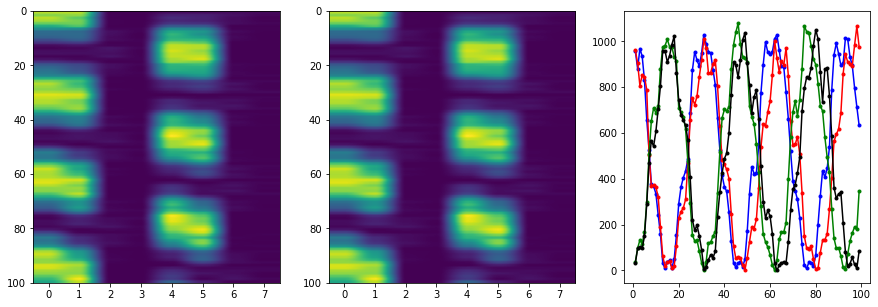

In [6]:
X,Y,Z = getStruturedData_grid(data,3)
x,y,z = getStruturedData_seq(data,n_qubits = 3)


f, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(Z, aspect='auto', extent=(-0.5, 8-0.5, t_max, 0))
ax[1].imshow(Z, aspect='auto', extent=(-0.5, 8-0.5, t_max, 0), interpolation = 'hanning')
index = np.where(y==0)
ax[2].plot(x[index],z[index], '-b.')
index = np.where(y==1) 
ax[2].plot(x[index],z[index], '-r.')
index = np.where(y==4)
ax[2].plot(x[index],z[index], '-g.')
index = np.where(y==5) 
ax[2].plot(x[index],z[index], '-k.')

plt.savefig('test.png')

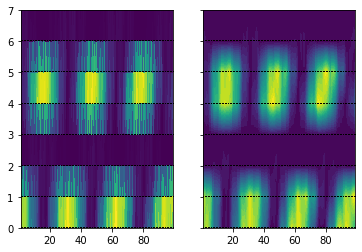

In [7]:
x,y,z = getStruturedData_seq(data,3)

f, ax = plt.subplots(1,2, sharex=True, sharey=True)
ax[0].tripcolor(x,y,z)
ax[1].tricontourf(x,y,z, 30) 
ax[1].plot(x,y, 'k,')
ax[0].plot(x,y, 'k,')
plt.savefig('test.png')

### Adding an environment

In [8]:
from qiskit.providers.aer import QasmSimulator

# Qiskit Aer noise module imports
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import QuantumError, ReadoutError
from qiskit.providers.aer.noise.errors import pauli_error
from qiskit.providers.aer.noise.errors import depolarizing_error
from qiskit.providers.aer.noise.errors import thermal_relaxation_error

def generate_noise_model(n_qubits, T1 = 50e3, dT1 = 10e3):
    # T1 and T2 values for qubits 0-3
    T1s = np.random.normal(T1, dT1, n_qubits) # Sampled from normal distribution mean 50 microsec
    T2s = np.random.normal(T1, dT1, n_qubits)  # Sampled from normal distribution mean 50 microsec

    # Truncate random T2s <= T1s
    T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(n_qubits)])

    # Instruction times (in nanoseconds)
    time_u1 = 0   # virtual gate
    time_u2 = 50  # (single X90 pulse)
    time_u3 = 100 # (two X90 pulses)
    time_cx = 300
    time_reset = 1000  # 1 microsecond
    time_measure = 1000 # 1 microsecond

    # QuantumError objects
    errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                    for t1, t2 in zip(T1s, T2s)]
    errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                      for t1, t2 in zip(T1s, T2s)]
    errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
                  for t1, t2 in zip(T1s, T2s)]
    errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
                  for t1, t2 in zip(T1s, T2s)]
    errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
                  for t1, t2 in zip(T1s, T2s)]
    errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
                 thermal_relaxation_error(t1b, t2b, time_cx))
                  for t1a, t2a in zip(T1s, T2s)]
                   for t1b, t2b in zip(T1s, T2s)]

    # Add errors to noise model
    noise_thermal = NoiseModel()
    for j in range(n_qubits):
        noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
        noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
        noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
        noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
        noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
        for k in range(n_qubits):
            noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])
    return noise_thermal

In [9]:
n_qubits = 3
noise_thermal = generate_noise_model(n_qubits, T1 = 1.0e3, dT1 = 0.1e3)
print(noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'reset', 'measure', 'u3', 'cx']
  Qubits with noise: [0, 1, 2]
  Specific qubit errors: [('reset', [0]), ('reset', [1]), ('reset', [2]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('cx', [0, 0]), ('cx', [0, 1]), ('cx', [0, 2]), ('cx', [1, 0]), ('cx', [1, 1]), ('cx', [1, 2]), ('cx', [2, 0]), ('cx', [2, 1]), ('cx', [2, 2])]


In [10]:
# Initializing a two-qubit quantum state
initial_state = [
    1/mt.sqrt(2)+0.j,
    1/mt.sqrt(2)+0.j,
    0,
    0,
    0,
    0,
    0,
    0
]
#Constructing the Hamiltonian
g0= 0.1
H = [
    [0.5,0,0,0,g0,g0,g0,g0],
    [0,1.5,0,0,g0,g0,g0,g0],
    [0,0,2.5,0,g0,g0,g0,g0],
    [0,0,0,3.5,g0,g0,g0,g0],
    [g0,g0,g0,g0,0.5,0,0,0],
    [g0,g0,g0,g0,0,1.5,0,0],
    [g0,g0,g0,g0,0,0,2.5,0],
    [g0,g0,g0,g0,0,0,0,3.5]
    
]

t_max = 100
dt = 1.0

time = np.arange(dt,t_max,dt)

shots =2048
# Create a Quantum Circuit acting on a quantum register
data = []
for t in time:
    #print(t)
    q = QuantumRegister(3, name = 'q')
    c = ClassicalRegister(3, name = 'c')
    circuit1 = QuantumCircuit(q,c,name='qc')
    # Create the superposition state to show that things are working
    circuit1.initialize(initial_state, [q[0],q[1],q[2]])

    circuit1.hamiltonian(H, t,[q[0],q[1],q[2]])

    circuit1.measure(0,0)
    circuit1.measure(1,1)
    circuit1.measure(2,2)
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit1, simulator,
              basis_gates=noise_thermal.basis_gates,
              noise_model=noise_thermal)
    results = job.result()
    counts = results.get_counts()

    data.append([t,counts])

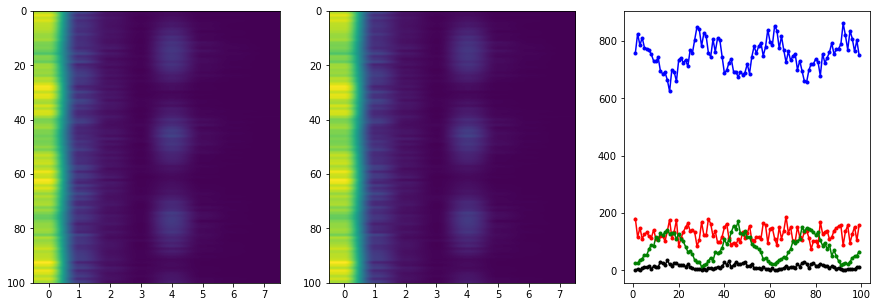

In [11]:
X,Y,Z = getStruturedData_grid(data,3)
x,y,z = getStruturedData_seq(data,n_qubits = 3)


f, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(Z, aspect='auto', extent=(-0.5, 8-0.5, t_max, 0))
ax[1].imshow(Z, aspect='auto', extent=(-0.5, 8-0.5, t_max, 0), interpolation = 'hanning')
index = np.where(y==0)
ax[2].plot(x[index],z[index], '-b.')
index = np.where(y==1) 
ax[2].plot(x[index],z[index], '-r.')
index = np.where(y==4)
ax[2].plot(x[index],z[index], '-g.')
index = np.where(y==5) 
ax[2].plot(x[index],z[index], '-k.')

plt.savefig('test.png')


## Some case studies

### Tunneling effect

In [12]:
def tridiag(c, u, d, N): 
    # c, u, d are center, upper and lower blocks, repeat N times
    cc = block_diag(*([c]*N)) 
    shift = c.shape[1]
    uu = block_diag(*([u]*N)) 
    uu = np.hstack((np.zeros((uu.shape[0], shift)), uu[:,:-shift]))
    dd = block_diag(*([d]*N)) 
    dd = np.hstack((dd[:,shift:],np.zeros((uu.shape[0], shift))))
    return cc+uu+dd

def getNumberQubits(n_levels,n_wells):

    n_qubits = int(np.ceil(mt.log2(n_wells*n_levels)))
    n_qubits = np.max([n_qubits,1])
    n_states = 2**n_qubits
    return n_qubits, n_states


def KP_model(initial_state,n_levels,n_wells, H0, G0, t_max, dt, shots, noise_thermal = None):

    n_qubits, n_states = getNumberQubits(n_levels,n_wells)
    
 
    
    print('number of wells:',n_wells, 'number of levels:',n_levels, 'number of qubits:',n_qubits)
    print('number of states in register:', n_states)
    H0 = np.matrix(H0)
    G0 = np.matrix(G0)
    H = tridiag(H0,G0,G0,n_wells)
    np.array(H)[0].tolist()

    H = tridiag(H0,G0,G0,n_wells)
    np.array(H)[0].tolist()
    print(H)

    time = np.arange(dt,t_max,dt)

    # Create a Quantum Circuit acting on a quantum register
    data = []

    number_timeloops = len(time)
    for i in tqdm(range(number_timeloops)):
        t = time[i]

        q = QuantumRegister(n_qubits, name = 'q')
        c = ClassicalRegister(n_qubits, name = 'c')
        circuit1 = QuantumCircuit(q,c,name='qc')
        # Create the superposition state to show that things are working
        q_list = []
        for n in range(n_qubits):
            q_list.append(q[n])
        circuit1.initialize(initial_state,q_list)

        circuit1.hamiltonian(H, t, q_list)

        for n in range(n_qubits):
            circuit1.measure(n,n)
        simulator = Aer.get_backend('qasm_simulator')
        if noise_thermal == None:  
            results = execute(circuit1, backend = simulator, shots=shots).result()
            counts = results.get_counts()
        else:
            job = execute(circuit1, simulator, shots=shots,
                      basis_gates=noise_thermal.basis_gates,
                      noise_model=noise_thermal)
            results = job.result()
            counts = results.get_counts()

        data.append([t,counts])
    return data

In [13]:
## Initializing a two-qubit quantum state
n_levels =  1
n_wells = 2
t_max = 20.0
dt = 0.125
shots =2048

n_qubits, n_states = getNumberQubits(n_levels,n_wells)
initial_state = [0] * n_states
initial_state[0] = 1

g0 = 1.
G0 = [[g0]]
H0 = [[10.0]]


data = KP_model(initial_state,n_levels,n_wells, H0, G0, t_max, dt, shots,noise_thermal = None)

number of wells: 2 number of levels: 1 number of qubits: 1
number of states in register: 2
[[10.  1.]
 [ 1. 10.]]


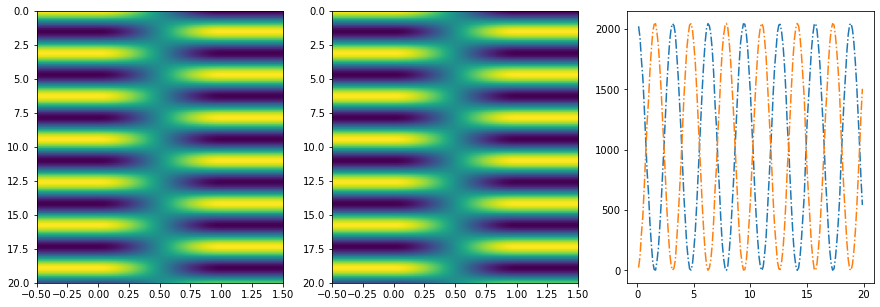

In [14]:
X,Y,Z = getStruturedData_grid(data,n_qubits)
x,y,z = getStruturedData_seq(data,n_qubits = n_qubits )


f, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0))
ax[1].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0), interpolation = 'hanning')
for i in range(n_states):
    index = np.where(y==i)
    ax[2].plot(x[index[:20]],z[index[:20]], '-.')

plt.savefig('test.png')

### Rabi oscillations

In [15]:
# Initializing a two-qubit quantum state
n_levels =  2
n_wells = 1
t_max = 100.0
dt = 0.1
shots =2048

n_qubits, n_states = getNumberQubits(n_levels,n_wells)
initial_state = [0] * n_states
initial_state[0] = 1

g0 = 0.1
G0 = [
    [g0,g0],
    [g0,g0] 
]
H0 = [
    [0.5,0.5],
    [0.5,1.5]  
]

data = KP_model(initial_state,n_levels,n_wells, H0, G0, t_max, dt, shots,noise_thermal = None)

number of wells: 1 number of levels: 2 number of qubits: 1
number of states in register: 2
[[0.5 0.5]
 [0.5 1.5]]


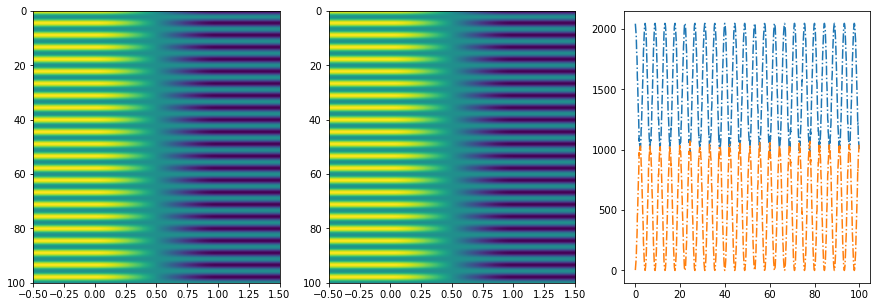

In [16]:
X,Y,Z = getStruturedData_grid(data,n_qubits)
x,y,z = getStruturedData_seq(data,n_qubits = n_qubits )


f, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0))
ax[1].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0), interpolation = 'hanning')
for i in range(n_states):
    index = np.where(y==i)
    ax[2].plot(x[index],z[index], '-.')

plt.savefig('test.png')

In [17]:
# Initializing a two-qubit quantum state
n_levels =  2
n_wells = 1
t_max = 100.0
dt = 0.1
shots =2048

n_qubits, n_states = getNumberQubits(n_levels,n_wells)
initial_state = [0] * n_states
initial_state[0] = 1

g0 = 0.1
G0 = [
    [g0,g0],
    [g0,g0] 
]
H0 = [
    [0.5,0.5],
    [0.5,1.5]  
]

noise_thermal = generate_noise_model(n_qubits, T1 = 1.0e3, dT1 = 0.1e3)
print(noise_thermal)

data = KP_model(initial_state,n_levels,n_wells, H0, G0, t_max, dt, shots,noise_thermal = noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'reset', 'measure', 'u3', 'cx']
  Qubits with noise: [0]
  Specific qubit errors: [('reset', [0]), ('measure', [0]), ('u2', [0]), ('u3', [0]), ('cx', [0, 0])]
number of wells: 1 number of levels: 2 number of qubits: 1
number of states in register: 2
[[0.5 0.5]
 [0.5 1.5]]


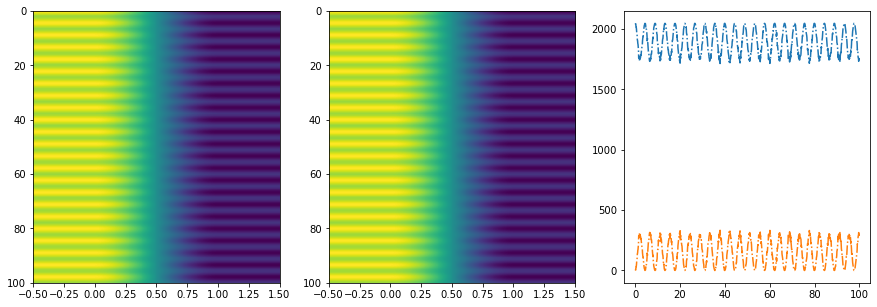

In [18]:
X,Y,Z = getStruturedData_grid(data,n_qubits)
x,y,z = getStruturedData_seq(data,n_qubits = n_qubits )


f, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0))
ax[1].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0), interpolation = 'hanning')
for i in range(n_states):
    index = np.where(y==i)
    ax[2].plot(x[index],z[index], '-.')

plt.savefig('test.png')



In [19]:
# Initializing a two-qubit quantum state
n_levels =  4
n_wells = 2
t_max = 200.0
dt = 1.0
shots =2048

n_qubits, n_states = getNumberQubits(n_levels,n_wells)
initial_state = [0] * n_states
initial_state[0] = 1

g0 = 0.05
G0 = [
    [g0,g0,g0,g0],
    [g0,g0,g0,g0],
    [g0,g0,g0,g0],
    [g0,g0,g0,g0]  
]
H0 = [
    [0.5,0.1,0,0],
    [0.1,1.5,0.1,0],
    [0,0.1,2.5,0.1],
    [0,0,0.1,3.5]   
]

noise_thermal = generate_noise_model(n_qubits, T1 = 5.0e3, dT1 = 1.0e3)
print(noise_thermal)

data = KP_model(initial_state,n_levels,n_wells, H0, G0, t_max, dt, shots,noise_thermal = noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'reset', 'measure', 'u3', 'cx']
  Qubits with noise: [0, 1, 2]
  Specific qubit errors: [('reset', [0]), ('reset', [1]), ('reset', [2]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('cx', [0, 0]), ('cx', [0, 1]), ('cx', [0, 2]), ('cx', [1, 0]), ('cx', [1, 1]), ('cx', [1, 2]), ('cx', [2, 0]), ('cx', [2, 1]), ('cx', [2, 2])]
number of wells: 2 number of levels: 4 number of qubits: 3
number of states in register: 8
[[0.5  0.1  0.   0.   0.05 0.05 0.05 0.05]
 [0.1  1.5  0.1  0.   0.05 0.05 0.05 0.05]
 [0.   0.1  2.5  0.1  0.05 0.05 0.05 0.05]
 [0.   0.   0.1  3.5  0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.5  0.1  0.   0.  ]
 [0.05 0.05 0.05 0.05 0.1  1.5  0.1  0.  ]
 [0.05 0.05 0.05 0.05 0.   0.1  2.5  0.1 ]
 [0.05 0.05 0.05 0.05 0.   0.   0.1  3.5 ]]


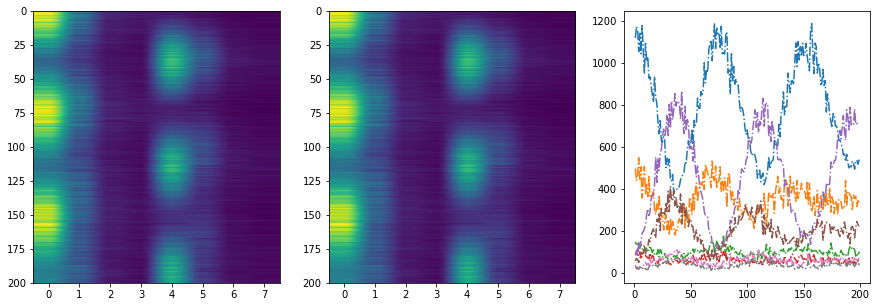

In [20]:
X,Y,Z = getStruturedData_grid(data,n_qubits)
x,y,z = getStruturedData_seq(data,n_qubits = n_qubits )


f, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0))
ax[1].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0), interpolation = 'hanning')
for i in range(n_states):
    index = np.where(y==i)
    ax[2].plot(x[index],z[index], '-.')

plt.savefig('test.png')

### The Kronig-Penney model

In [21]:
## Initializing the quantum state
n_levels =  1
n_wells = 32
t_max = 10.0
dt = 0.01
shots =2048

n_qubits, n_states = getNumberQubits(n_levels,n_wells)
initial_state = [0] * n_states
initial_state[0] = 1

g0 = 1.5
G0 = [[g0]]
H0 = [[10.0]]


data = KP_model(initial_state,n_levels,n_wells, H0, G0, t_max, dt, shots,noise_thermal = None)

number of wells: 32 number of levels: 1 number of qubits: 5
number of states in register: 32
[[10.   1.5  0.  ...  0.   0.   0. ]
 [ 1.5 10.   1.5 ...  0.   0.   0. ]
 [ 0.   1.5 10.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ... 10.   1.5  0. ]
 [ 0.   0.   0.  ...  1.5 10.   1.5]
 [ 0.   0.   0.  ...  0.   1.5 10. ]]


(999, 32)
(999, 32)


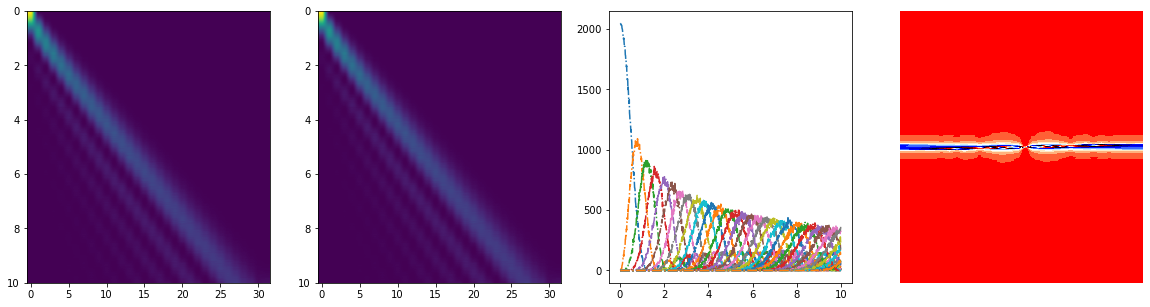

In [22]:
X,Y,Z = getStruturedData_grid(data,n_qubits)
x,y,z = getStruturedData_seq(data,n_qubits = n_qubits )
print(Z.shape)


f, ax = plt.subplots(1,4, figsize=(20, 5))
ax[0].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0))
ax[1].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0), interpolation = 'hanning')
for i in range(n_states):
    index = np.where(y==i)
    ax[2].plot(x[index],z[index], '-.')

iZ = np.fft.fft2(Z)
iZ = np.fft.fftshift(iZ)
#iZ = np.swapaxes(iZ,0,1)
print(Z.shape)
ax[3].axis('off')
ax[3].imshow(np.abs(iZ[:,:]), aspect='auto', interpolation = 'hanning',cmap = 'flag')
plt.savefig('test.png')

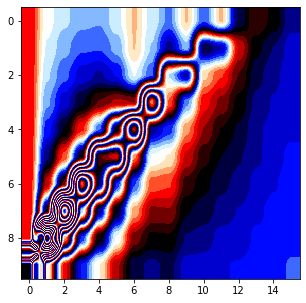

In [23]:
plt.figure(figsize=(5, 5))
plt.imshow(np.abs(iZ[490:500,16:]), aspect='auto', interpolation = 'hanning',cmap = 'flag')

In [24]:
## Initializing the quantum state
n_levels =  1
n_wells = 32
t_max = 10.0
dt = 0.01
shots =2048

n_qubits, n_states = getNumberQubits(n_levels,n_wells)
initial_state = [0] * n_states
initial_state[0] = 1

g0 = 1.5
G0 = [[g0]]
H0 = [[10.0]]

noise_thermal = generate_noise_model(n_qubits, T1 = 50e3, dT1 = 10e3)
print(noise_thermal)

data = KP_model(initial_state,n_levels,n_wells, H0, G0, t_max, dt, shots,noise_thermal = noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'reset', 'measure', 'u3', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('reset', [4]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 0]), ('cx', [0, 1]), ('cx', [0, 2]), ('cx', [0, 3]), ('cx', [0, 4]), ('cx', [1, 0]), ('cx', [1, 1]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [1, 4]), ('cx', [2, 0]), ('cx', [2, 1]), ('cx', [2, 2]), ('cx', [2, 3]), ('cx', [2, 4]), ('cx', [3, 0]), ('cx', [3, 1]), ('cx', [3, 2]), ('cx', [3, 3]), ('cx', [3, 4]), ('cx', [4, 0]), ('cx', [4, 1]), ('cx', [4, 2]), ('cx', [4, 3]), ('cx', [4, 4])]
number of wells: 32 number of levels: 1 number of qubits: 5
number of states in register: 32
[[10.   1.5  0.  ...  0.  

C:\Users\Ariel Guerreiro\.conda\envs\QInformation\lib\site-packages\qiskit\extensions\quantum_initializer\squ.py:129: RuntimeWarning: invalid value encountered in arccos
  beta = 2 * np.arccos(np.abs(u00))


(999, 32)
(999, 32)


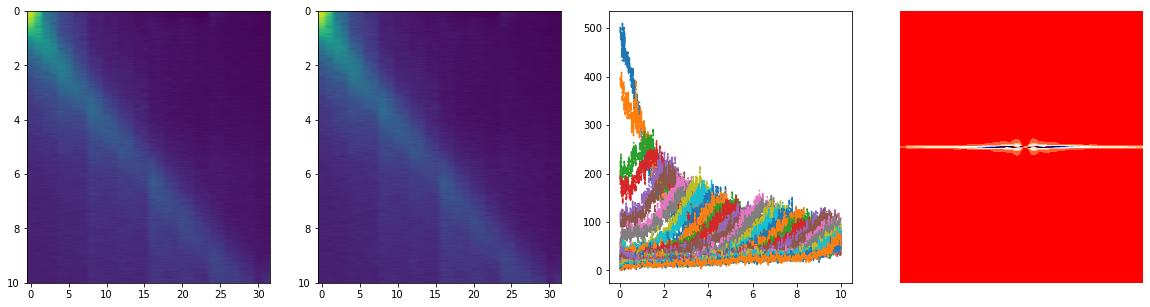

In [25]:
X,Y,Z = getStruturedData_grid(data,n_qubits)
x,y,z = getStruturedData_seq(data,n_qubits = n_qubits )
print(Z.shape)


f, ax = plt.subplots(1,4, figsize=(20, 5))
ax[0].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0))
ax[1].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0), interpolation = 'hanning')
for i in range(n_states):
    index = np.where(y==i)
    ax[2].plot(x[index],z[index], '-.')

iZ = np.fft.fft2(Z)
iZ = np.fft.fftshift(iZ)
#iZ = np.swapaxes(iZ,0,1)
print(Z.shape)
ax[3].axis('off')
ax[3].imshow(np.abs(iZ[:,:]), aspect='auto', interpolation = 'hanning',cmap = 'flag')
plt.savefig('test.png')

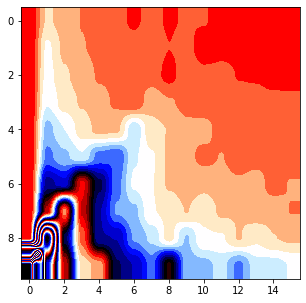

In [26]:
plt.figure(figsize=(5, 5))
plt.imshow(np.abs(iZ[490:500,16:]), aspect='auto', interpolation = 'hanning',cmap = 'flag')

In [27]:
## Initializing the quantum state
n_levels =  1
n_wells = 128 *2
t_max = 100.0
dt = 0.125
shots =2048

n_qubits, n_states = getNumberQubits(n_levels,n_wells)
initial_state = [0] * n_states
initial_state[0] = 1

g0 = 1.
G0 = [[g0]]
H0 = [[10.0]]


data = KP_model(initial_state,n_levels,n_wells, H0, G0, t_max, dt, shots,noise_thermal = None)

number of wells: 256 number of levels: 1 number of qubits: 8
number of states in register: 256
[[10.  1.  0. ...  0.  0.  0.]
 [ 1. 10.  1. ...  0.  0.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 10.  1.  0.]
 [ 0.  0.  0. ...  1. 10.  1.]
 [ 0.  0.  0. ...  0.  1. 10.]]


(799, 256)
(799, 256)


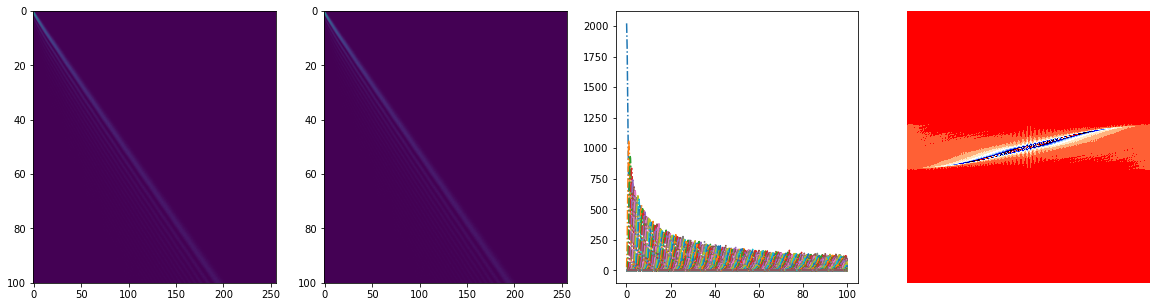

In [28]:
X,Y,Z = getStruturedData_grid(data,n_qubits)
x,y,z = getStruturedData_seq(data,n_qubits = n_qubits )
print(Z.shape)


f, ax = plt.subplots(1,4, figsize=(20, 5))
ax[0].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0))
ax[1].imshow(Z, aspect='auto', extent=(-0.5, n_states-0.5, t_max, 0), interpolation = 'hanning')
for i in range(n_states):
    index = np.where(y==i)
    ax[2].plot(x[index],z[index], '-.')

iZ = np.fft.fft2(Z)
iZ = np.fft.fftshift(iZ)
#iZ = np.swapaxes(iZ,0,1)
print(Z.shape)
ax[3].axis('off')
ax[3].imshow(np.abs(iZ[:,:]), aspect='auto', interpolation = 'hanning',cmap = 'flag')
plt.savefig('test.png')

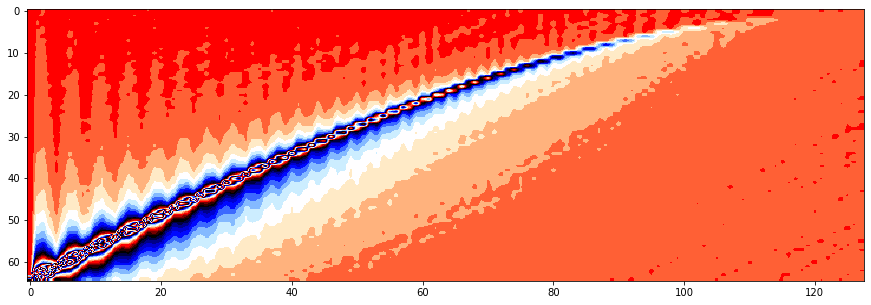

In [29]:
plt.figure(figsize=(15, 5))
plt.imshow(np.abs(10*iZ[335:400,128:]), aspect='auto', interpolation = 'hanning',cmap = 'flag')